In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display

In [76]:
#importando e tratando os dados

base_df = pd.read_csv('C:\\Users\\Juliano\\Desktop\\vscode\\data\\adult11.csv')

base_df = base_df[base_df['occupation'] != '?'].reset_index(drop=True)
base_df = base_df.loc[base_df['hours-per-week'] > 0]

base_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46028,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
46029,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
46030,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
46031,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [25]:
#Separando colunas
df_study1 = base_df[['fnlwgt','education','salary']]

#Classificando baseado no salário
df_study1.loc[df_study1['salary'] == ">50K", 'ClasseMonetaria'] = 'Alta'
df_study1.loc[df_study1['salary'] == "<=50K", 'ClasseMonetaria'] = 'Baixa'

df_study1 = df_study1.groupby(['education','ClasseMonetaria'], as_index=False)['fnlwgt'].sum().rename(columns={'fnlwgt':'Amostra','education':'Educação'})

df_study1

C:\Users\Juliano\AppData\Local\Temp\ipykernel_6016\2896386095.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_study1.loc[df_study1['salary'] == ">50K", 'ClasseMonetaria'] = 'Alta'


,Educação,ClasseMonetaria,Amostra
0,10th,Alta,16412727
1,10th,Baixa,227980979
2,11th,Alta,15602228
3,11th,Baixa,301922205
4,12th,Alta,9787892
5,12th,Baixa,109810146
6,1st-4th,Alta,1501918
7,1st-4th,Baixa,53265130
8,5th-6th,Alta,4111436
9,5th-6th,Baixa,103809922


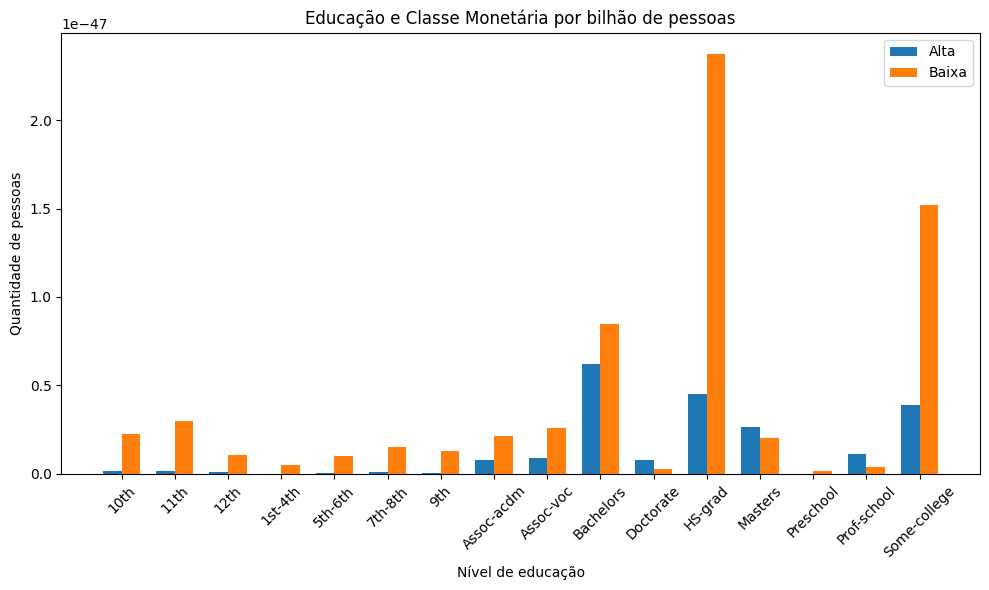

In [40]:
## Exibição de gráfico exibindo a quantidade de pessoas e a distribuição do nível de escolaridade, de classe monetária alta e baixa


#Dividindo a amostra por 1000000000 (Bilhão) para uma melhor visualização
df_study1['Amostra'] = df_study1['Amostra'].astype(float)
df_study1.loc[:, 'Amostra'] = df_study1.loc[:, 'Amostra'] / 1000000000

df_plot = df_study1.pivot(index='Educação', columns='ClasseMonetaria', values='Amostra')

bar_width = 0.35
index = np.arange(len(df_plot))

plt.figure(figsize=(10,6))
plt.bar(index, df_plot['Alta'], bar_width, label='Alta')
plt.bar(index + bar_width, df_plot['Baixa'], bar_width, label='Baixa')



plt.xlabel('Nível de educação')
plt.ylabel('Quantidade de pessoas')
plt.title('Educação e Classe Monetária por bilhão de pessoas')
plt.xticks(index + bar_width / 2, df_plot.index, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

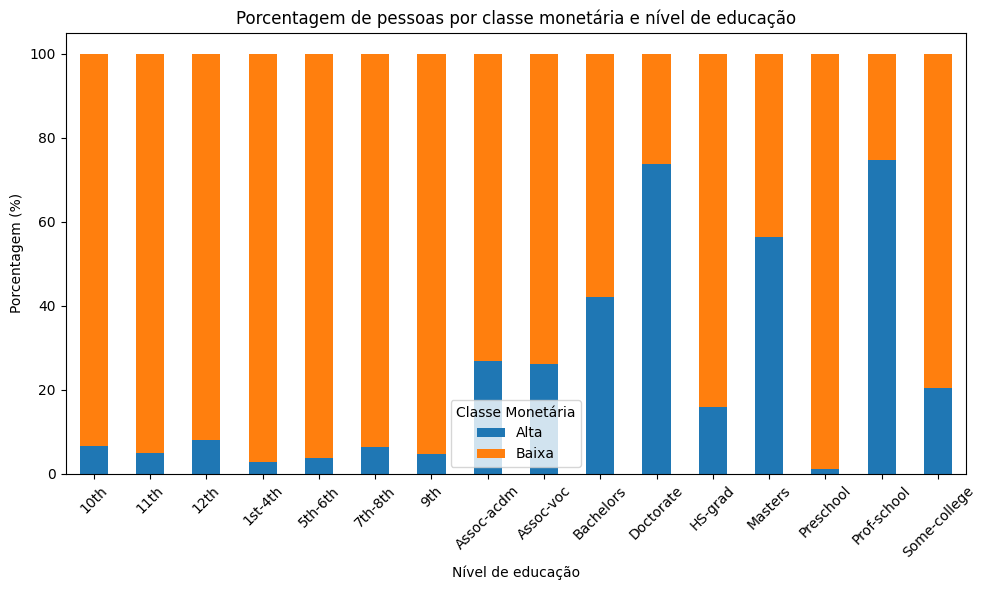

In [41]:
## Plotando um gráfico que exibe a razão entre a educação e classe salarial

df_percent = df_plot.div(df_plot.sum(axis=1), axis=0) * 100

df_percent.plot(kind='bar', stacked=True, figsize=(10,6), color=['#1f77b4', '#ff7f0e'])

plt.ylabel('Porcentagem (%)')
plt.xlabel('Nível de educação')
plt.title('Porcentagem de pessoas por classe monetária e nível de educação')
plt.legend(title='Classe Monetária')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [53]:
#Ocupações mais e menos comuns entre os gêneros

df_study2 = base_df[['gender','occupation','fnlwgt']]

#Agrupando
df_study2 = df_study2.groupby(['gender','occupation'], as_index=False)['fnlwgt'].sum().sort_values(by='fnlwgt',ascending=False).reset_index(names='Quantidade',drop=True)

#Tratando tabela, renomeando coluna
df_study2 = df_study2.rename(columns={'occupation':'Ocupação','fnlwgt':'Quantidade'})

#Comparação de porcentagem, coletando totais
total_pessoas = df_study2['Quantidade'].sum()
total_masculino = df_study2.loc[df_study2['gender'] == 'Male']['Quantidade'].sum()
total_feminino = df_study2.loc[df_study2['gender'] == 'Female']['Quantidade'].sum()

#Separando dataframes para exibição dos dados
df_top_male_occupation = df_study2.loc[df_study2['gender'] == 'Male'].drop(columns='gender').head(3)
df_top_male_occupation['Porcentagem do Total'] = ((df_top_male_occupation['Quantidade'] / total_pessoas) * 100).round(5)
df_top_male_occupation['Porcentagem do Total do Gênero'] = ((df_top_male_occupation['Quantidade'] / total_masculino) * 100).round(5)

df_bot_male_occupation = df_study2.loc[df_study2['gender'] == 'Male'].drop(columns='gender').tail(3)
df_bot_male_occupation['Porcentagem do Total'] = ((df_bot_male_occupation['Quantidade'] / total_pessoas) * 100).round(5)
df_bot_male_occupation['Porcentagem do Total do Gênero'] = ((df_bot_male_occupation['Quantidade'] / total_masculino) * 100).round(5)



df_top_female_occupation = df_study2.loc[df_study2['gender'] == 'Female'].drop(columns='gender').head(3)
df_top_female_occupation['Porcentagem do Total'] = ((df_top_female_occupation['Quantidade'] / total_pessoas) * 100).round(5)
df_top_female_occupation['Porcentagem do Total do Gênero'] = ((df_top_female_occupation['Quantidade'] / total_feminino) * 100).round(5)


df_bot_female_occupation = df_study2.loc[df_study2['gender'] == 'Female'].drop(columns='gender').tail(3)
df_bot_female_occupation['Porcentagem do Total'] = ((df_bot_female_occupation['Quantidade'] / total_pessoas) * 100).round(5)
df_bot_female_occupation['Porcentagem do Total do Gênero'] = ((df_bot_female_occupation['Quantidade'] / total_feminino) * 100).round(5)


print("Mais populares entre homens")
display(df_top_male_occupation)
print("Menos populares entre homens")
display(df_bot_male_occupation)

print("Mais populares entre mulheres")
display(df_top_female_occupation)
print("Menos populares entre mulheres")
display(df_bot_female_occupation)

Mais populares entre homens


,Ocupação,Quantidade,Porcentagem do Total,Porcentagem do Total do Gênero
0,Craft-repair,1114029728,12.75028,18.65886
1,Exec-managerial,811516298,9.28795,13.59207
2,Prof-specialty,743235966,8.50647,12.44844


Menos populares entre homens


,Ocupação,Quantidade,Porcentagem do Total,Porcentagem do Total do Gênero
16,Tech-support,167672004,1.91904,2.80833
25,Armed-Forces,3254589,0.03725,0.05451
26,Priv-house-serv,2502142,0.02864,0.04191


Mais populares entre mulheres


,Ocupação,Quantidade,Porcentagem do Total,Porcentagem do Total do Gênero
3,Adm-clerical,711312104,8.14110,25.70897
5,Other-service,484540849,5.54566,17.51277
9,Prof-specialty,401398658,4.59408,14.50776


Menos populares entre mulheres


,Ocupação,Quantidade,Porcentagem do Total,Porcentagem do Total do Gênero
22,Protective-serv,25254759,0.28905,0.91278
23,Transport-moving,24808137,0.28393,0.89664
24,Farming-fishing,17562082,0.20100,0.63475


In [114]:
df_study3 = base_df.groupby(['education','hours-per-week'] , as_index=False)['fnlwgt'].sum().reset_index(drop=True)

df_study3 = df_study3.rename(columns={'education':'Educação','hours-per-week':'HorasSemanaTrabalho','fnlwgt':'Quantidade'})

#Gerando series dos totais
total_por_educacao = (df_study3.groupby('Educação')['Quantidade'].sum())
df_study3['TotalEducação'] = (df_study3.groupby('Educação')['Quantidade'].transform('sum'))

df_study3['Porcentagem'] = ((df_study3['Quantidade'] / df_study3['TotalEducação']) * 100)

intervalos = range(0, 101, 10)
titulo = [f"{i+1}-{i+10}" for i in intervalos[:-1]]

df_study3['HorasSemanaTrabalho'] = pd.cut(df_study3['HorasSemanaTrabalho'], bins=intervalos, labels=titulo, right=True, include_lowest=True)

df_study3_1 = df_study3[['Educação','HorasSemanaTrabalho','Porcentagem']].groupby(['Educação','HorasSemanaTrabalho'], as_index=False)['Porcentagem'].sum().reset_index(drop=True)

df_study3
#df_study3_1


C:\Users\Juliano\AppData\Local\Temp\ipykernel_6016\2537858349.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_study3_1 = df_study3[['Educação','HorasSemanaTrabalho','Porcentagem']].groupby(['Educação','HorasSemanaTrabalho'], as_index=False)['Porcentagem'].sum().reset_index(drop=True)


,Educação,HorasSemanaTrabalho,Quantidade,TotalEducação,Porcentagem
0,10th,1-10,260669,244393706,0.106659
1,10th,1-10,127493,244393706,0.052167
2,10th,1-10,152044,244393706,0.062213
3,10th,1-10,257394,244393706,0.105319
4,10th,1-10,836961,244393706,0.342464
...,...,...,...,...,...
924,Some-college,91-100,230168,1907613722,0.012066
925,Some-college,91-100,362832,1907613722,0.019020
926,Some-college,91-100,129311,1907613722,0.006779
927,Some-college,91-100,967780,1907613722,0.050732


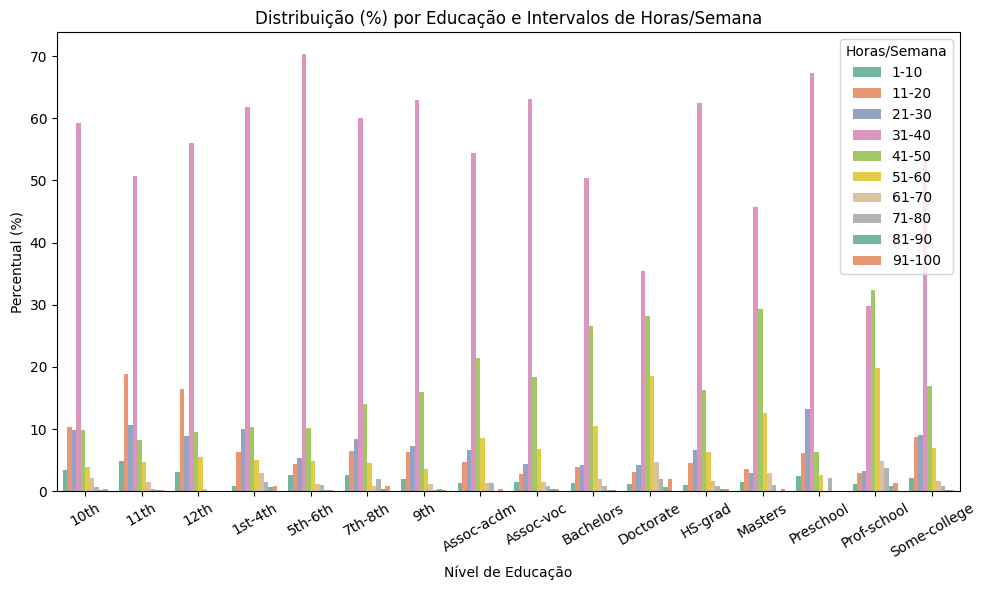

In [115]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=df_study3_1,
    x='Educação',
    y='Porcentagem',
    hue='HorasSemanaTrabalho',
    palette='Set2'
)

plt.title('Distribuição (%) por Educação e Intervalos de Horas/Semana')
plt.xlabel('Nível de Educação')
plt.ylabel('Percentual (%)')
plt.legend(title='Horas/Semana')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()